<a href="https://colab.research.google.com/github/lilasu086/Individual_CodingProject/blob/main/SupplyChain_InventoryPlanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: Inventory & Capacity Planning | Hyatt’s Problem (Overbooking level optimization)

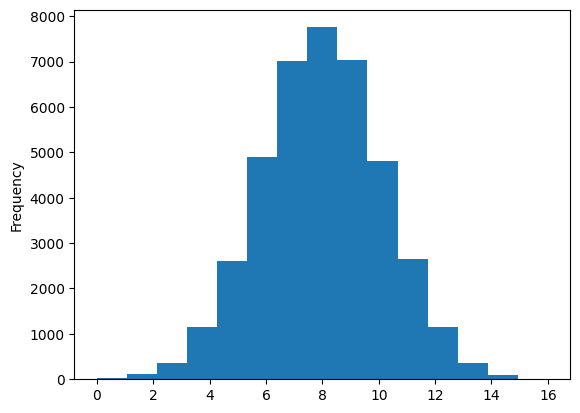

In [ ]:
# set input parameters
noshow_mean = 8
noshow_sd = 2
fare = 150
capacity = 100
overbook_cost = 25
empty_cost = 100
# simulaion-specific parameter
simulation_run = 40000

# simulate high fare demand
# try different simulation runs, observe normality of histogram
import numpy as np
import pandas as pd

np.random.seed(12345)
df_noshow = pd.DataFrame({'noshow' : np.clip(np.random.normal(noshow_mean, noshow_sd, simulation_run).round(), 0, None)})
# Since the normal distribution is not bounded, it can produce negative values in rare cases, especially when rounding to the nearest integer.
# To ensure that the noshow column contains only non-negative integers, you can use the np.clip() function to clip the values to a specified range.
df_noshow
#np.random.normal(10,5,50).std()
df_noshow.noshow.plot.hist(bins=15)

# as a rule of thumb, try overbooking levels between
# mean - 3SD, mean + 3SD
df_optimize = pd.DataFrame({'overbooking_level' : np.arange(2,15)})

In [ ]:
# # Iterate over different overbooking levels and compute average profit
# for i in np.arange(0, df_optimize.shape[0]):
#     df_noshow['overbooking_level'] = df_optimize.overbooking_level[i]
#     df_noshow['actual_no_shows'] = np.maximum(0, df_noshow['noshow'] - df_noshow['overbooking_level'])
#     df_noshow['booked_rooms'] = np.minimum(capacity, capacity + df_noshow['overbooking_level'])
#     df_noshow['revenue'] = df_noshow['booked_rooms'] * fare
#     df_noshow['denial_penalty'] = -overbook_cost * np.maximum(0, df_noshow['noshow'] - capacity)
#     df_noshow['empty_room'] = -empty_cost * np.maximum(0, capacity - df_noshow['booked_rooms'])
#     df_noshow['profit_after'] = df_noshow['revenue'] + df_noshow['denial_penalty'] + df_noshow['empty_room']
#     df_optimize.loc[i, 'avg_profit'] = df_noshow.profit_after.mean()
#     df_optimize.loc[i, 'sd_profit'] = df_noshow.profit_after.std()

# # Verify intermediate calculations
# df_noshow.sort_values('profit_after', ascending = False)

In [ ]:
df_optimize['overbooking_level']

0      2
1      3
2      4
3      5
4      6
5      7
6      8
7      9
8     10
9     11
10    12
11    13
12    14
Name: overbooking_level, dtype: int64

In [ ]:
# Iterate over different overbooking levels and compute average profit
for i in np.arange(0,df_optimize.shape[0]):
    #overbooking_level = df_optimize.loc[i, 'overbooking_level']
    df_noshow['overbooking_level'] = df_optimize.overbooking_level[i]
    df_noshow['profit_before'] = fare * capacity
    df_noshow['denial_penalty'] = -(overbook_cost) * np.maximum(df_noshow['overbooking_level'] - df_noshow['noshow'], 0)
    df_noshow['empty_room'] = -(fare) * np.maximum(df_noshow['noshow'] - df_noshow['overbooking_level'], 0)
    df_noshow['profit_after'] = df_noshow['profit_before'] + df_noshow['denial_penalty'] + df_noshow['empty_room']
    df_optimize.loc[i, 'avg_profit'] = df_noshow.profit_after.mean()
    df_optimize.loc[i, 'sd_profit'] = df_noshow.profit_after.std()

# Verify intermediate calculations
df_noshow.sort_values('profit_after', ascending = False)

,noshow,overbooking_level,profit_before,denial_penalty,empty_room,profit_after
7865,14.0,14,15000,-0.0,-0.0,15000.0
21752,14.0,14,15000,-0.0,-0.0,15000.0
30332,14.0,14,15000,-0.0,-0.0,15000.0
18107,14.0,14,15000,-0.0,-0.0,15000.0
35112,14.0,14,15000,-0.0,-0.0,15000.0
...,...,...,...,...,...,...
27930,1.0,14,15000,-325.0,-0.0,14675.0
31176,1.0,14,15000,-325.0,-0.0,14675.0
1223,1.0,14,15000,-325.0,-0.0,14675.0
31418,0.0,14,15000,-350.0,-0.0,14650.0


In [ ]:
# verify that avg_profit, sd_profit calculated and stored as expected
df_optimize.sort_values("avg_profit", ascending=False)

,overbooking_level,avg_profit,sd_profit
8,10,14921.579375,75.260508
9,11,14915.273750,54.999779
7,9,14906.889375,115.338403
10,12,14897.335000,50.224417
11,13,14874.351875,50.189663
6,8,14861.469375,167.195467
12,14,14849.806875,50.510626
5,7,14782.125625,218.961046
4,6,14672.095625,259.483588
3,5,14540.667500,284.584990


[Text(0, 0.5, 'Expected Profit (avg_profit)'),
 Text(0.5, 0, 'Uncertainty (sd_profit)')]

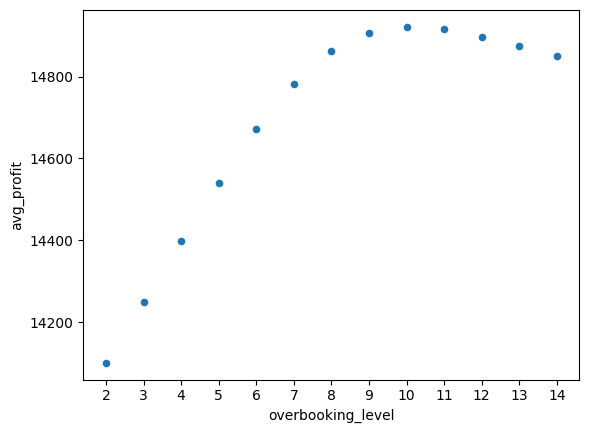

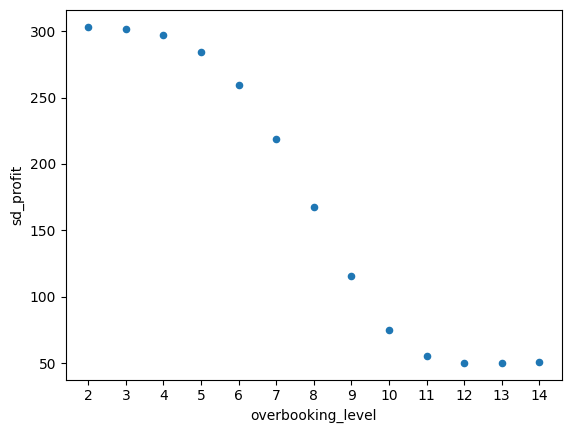

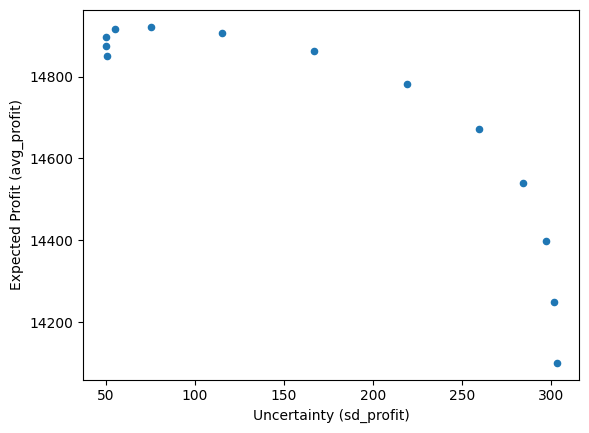

In [ ]:
# relationship between avg and sd of profit with protection level
df_optimize.plot.scatter(x='overbooking_level',y='avg_profit',xticks=range(2,15))
df_optimize.plot.scatter(x='overbooking_level',y='sd_profit',xticks=range(2,15))

# profit risk: efficiency frontier
df_optimize.plot.scatter(y='avg_profit',x='sd_profit').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)")

Answer 1

From the simulation results, it is evident that the optimal overbooking level is 10, with an estimated profit of \$14921.579375. However, it is noteworthy that although this profit estimation is relatively high, its standard deviation is not the smallest among the different overbooking levels. This indicates that the profit estimation for this level may not be stable. Nevertheless, the standard deviation for this level is relatively small overall. In contrast, the overbooking level of 13 demonstrates the smallest standard deviation.

In summary, while there is not a significant difference in the estimated profits across the various overbooking levels, with most falling within the range of \$14,000 to \$15,000, the standard deviation varies considerably between levels. Therefore, when determining the optimal overbooking level, it is crucial to consider the standard deviation value to mitigate the risk of obtaining more unstable profit results.


## Part II: Inventory & Capacity Planning | The Parka Problem (Inventory level optimization)

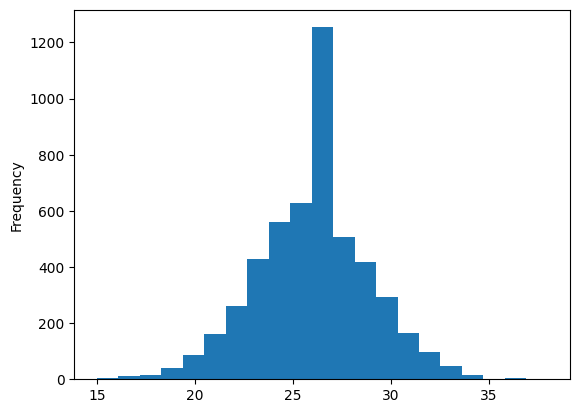

In [ ]:
# set input parameters
demand_mean = 26
demand_sd = 3
fare = 140
markdown_price = 40
cost = 70
# simulaion-specific parameter
simulation_run = 5000

# simulate high fare demand
# try different simulation runs, observe normality of histogram
import numpy as np
import pandas as pd

np.random.seed(12345)
df_demand = pd.DataFrame({'demand' : np.clip(np.random.normal(demand_mean, demand_sd, simulation_run).round(), 0, None)})
# Since the normal distribution is not bounded, it can produce negative values in rare cases, especially when rounding to the nearest integer.
# To ensure that the noshow column contains only non-negative integers, you can use the np.clip() function to clip the values to a specified range.
df_demand
#np.random.normal(10,5,50).std()
df_demand.demand.plot.hist(bins=21)

# as a rule of thumb, try overbooking levels between
# mean - 3SD, mean + 3SD
df_optimize = pd.DataFrame({'order_level' : np.arange(17,36)})

In [ ]:
df_optimize['order_level']

0     17
1     18
2     19
3     20
4     21
5     22
6     23
7     24
8     25
9     26
10    27
11    28
12    29
13    30
14    31
15    32
16    33
17    34
18    35
Name: order_level, dtype: int64

In [ ]:
# # Iterate over different overbooking levels and compute average profit
# for i in np.arange(0,df_optimize.shape[0]):
#     df_demand['order_level'] = df_optimize.order_level[i]
#     df_demand['revenue_origin'] = (fare) * df_demand['demand']
#     df_demand['revenue_leftover'] = (markdown_price) * np.maximum(df_demand['order_level'] - df_demand['demand'], 0)
#     df_demand['cost'] = -(cost) * np.maximum(df_demand['order_level'], df_demand['demand'])
#     df_demand['profit_after'] = df_demand['revenue_origin'] + df_demand['revenue_leftover'] + df_demand['cost']
#     df_optimize.loc[i, 'avg_profit'] = df_demand.profit_after.mean()
#     df_optimize.loc[i, 'sd_profit'] = df_demand.profit_after.std()

# # Verify intermediate calculations
# df_demand.sort_values('profit_after', ascending = False)

In [ ]:
# # Iterate over different overbooking levels and compute average profit
# for i in np.arange(0,df_optimize.shape[0]):
#     df_demand['order_level'] = df_optimize.order_level[i]
#     df_demand['revenue_origin'] = (fare) *  np.minimum(df_demand['order_level'], df_demand['demand'])
#     #df_demand['opportunity_cost'] = - (fare) * np.maximum(df_demand['demand'] - df_demand['order_level'], 0)
#     df_demand['revenue_leftover'] = (markdown_price) * np.maximum(df_demand['order_level'] - df_demand['demand'], 0)
#     df_demand['cost'] = -(cost) * df_demand['order_level']
#     df_demand['profit_after'] = df_demand['revenue_origin'] + df_demand['revenue_leftover'] + df_demand['cost']
#     df_optimize.loc[i, 'avg_profit'] = df_demand.profit_after.mean()
#     df_optimize.loc[i, 'sd_profit'] = df_demand.profit_after.std()

# # Verify intermediate calculations
# df_demand.sort_values('profit_after', ascending = False)

In [ ]:
# Iterate over different overbooking levels and compute average profit
for i in np.arange(0,df_optimize.shape[0]):
    df_demand['order_level'] = df_optimize.order_level[i]
    df_demand['revenue_origin'] = (fare) * np.minimum(df_demand['order_level'], df_demand['demand'])
    #df_demand['opportunity_cost'] = - (fare) * np.maximum(df_demand['demand'] - df_demand['order_level'], 0)
    df_demand['revenue_leftover'] = (markdown_price) * np.maximum(df_demand['order_level'] - df_demand['demand'], 0)
    df_demand['cost'] = -(cost) * df_demand['order_level']
    df_demand['profit_before'] = df_demand['revenue_origin'] + df_demand['revenue_leftover'] + df_demand['cost']
    df_demand['profit_after'] = df_demand['profit_before'] - (fare-cost) * np.maximum(df_demand['demand'] - df_demand['order_level'], 0)
    df_optimize.loc[i, 'avg_profit'] = df_demand.profit_after.mean()
    df_optimize.loc[i, 'sd_profit'] = df_demand.profit_after.std()

# Verify intermediate calculations
df_demand.sort_values('profit_after', ascending = False)

,demand,order_level,revenue_origin,revenue_leftover,cost,profit_before,profit_after
1530,35.0,35,4900.0,0.0,-2450,2450.0,2450.0
22,36.0,35,4900.0,0.0,-2450,2450.0,2380.0
1298,36.0,35,4900.0,0.0,-2450,2450.0,2380.0
410,36.0,35,4900.0,0.0,-2450,2450.0,2380.0
3600,36.0,35,4900.0,0.0,-2450,2450.0,2380.0
...,...,...,...,...,...,...,...
2346,16.0,35,2240.0,760.0,-2450,550.0,550.0
1223,16.0,35,2240.0,760.0,-2450,550.0,550.0
1603,15.0,35,2100.0,800.0,-2450,450.0,450.0
3233,15.0,35,2100.0,800.0,-2450,450.0,450.0


In [ ]:
# # Iterate over different overbooking levels and compute average profit
# for i in np.arange(0,df_optimize.shape[0]):
#     df_demand['order_level'] = df_optimize.order_level[i]
#     df_demand['revenue_origin'] = (fare) * df_demand['demand']
#     #df_demand['opportunity_cost'] = - (fare) * np.maximum(df_demand['demand'] - df_demand['order_level'], 0)
#     df_demand['revenue_leftover'] = (markdown_price) * np.maximum(df_demand['order_level'] - df_demand['demand'], 0)
#     df_demand['cost'] = -(cost) * df_demand['order_level']
#     df_demand['profit_after'] = df_demand['revenue_origin'] + df_demand['revenue_leftover'] + df_demand['cost']
#     df_demand['profit_after_2'] = df_demand['profit_after'] - (fare-cost) * np.maximum(df_demand['demand'] - df_demand['order_level'], 0)
#     df_optimize.loc[i, 'avg_profit'] = df_demand.profit_after_2.mean()
#     df_optimize.loc[i, 'sd_profit'] = df_demand.profit_after_2.std()

# # Verify intermediate calculations
# df_demand.sort_values('profit_after_2', ascending = False)

In [ ]:
# # Iterate over different overbooking levels and compute average profit
# for i in np.arange(0,df_optimize.shape[0]):
#     df_demand['order_level'] = df_optimize.order_level[i]
#     df_demand['revenue_origin'] = (fare-cost) * df_demand['demand']
#     df_demand['revenue_leftover'] = (markdown_price-cost) * np.maximum(df_demand['order_level'] - df_demand['demand'], 0)
#     df_demand['profit_after'] = df_demand['revenue_origin'] + df_demand['revenue_leftover']
#     df_optimize.loc[i, 'avg_profit'] = df_demand.profit_after.mean()
#     df_optimize.loc[i, 'sd_profit'] = df_demand.profit_after.std()

# # Verify intermediate calculations
# df_demand.sort_values('profit_after', ascending = False)

In [ ]:
# verify that avg_profit, sd_profit calculated and stored as expected
df_optimize.sort_values("avg_profit", ascending=False)

,order_level,avg_profit,sd_profit
12,29,1688.496,245.834222
11,28,1683.136,216.511480
13,30,1679.644,268.687982
14,31,1660.864,283.785412
10,27,1660.504,186.264449
15,32,1636.508,293.096822
9,26,1616.758,161.545315
16,33,1608.888,297.764632
17,34,1579.636,299.430391
8,25,1551.490,151.558549


[Text(0, 0.5, 'Expected Profit (avg_profit)'),
 Text(0.5, 0, 'Uncertainty (sd_profit)')]

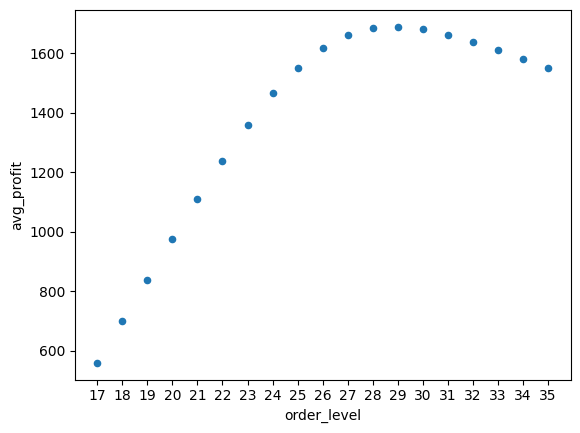

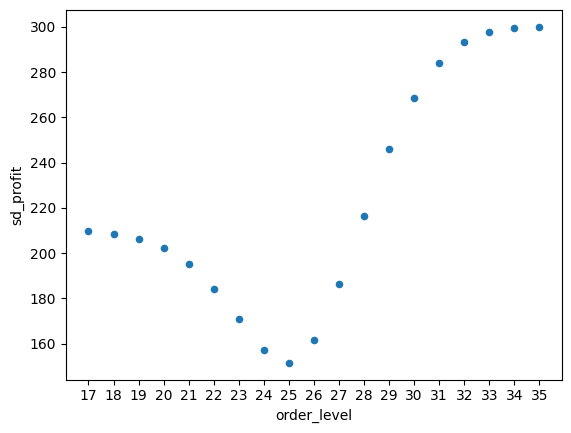

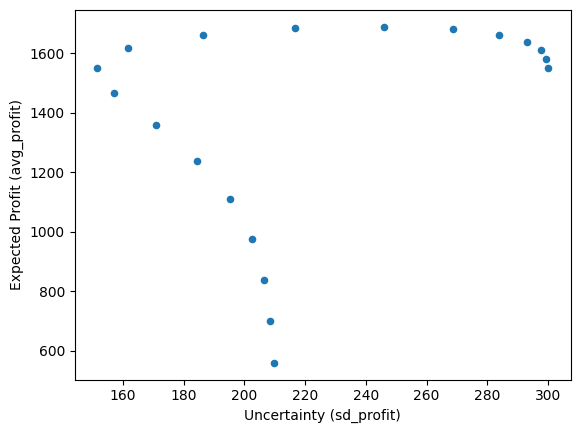

In [ ]:
# relationship between avg and sd of profit with protection level
df_optimize.plot.scatter(x='order_level',y='avg_profit',xticks=range(17,36))
df_optimize.plot.scatter(x='order_level',y='sd_profit',xticks=range(17,36))

# profit risk: efficiency frontier
df_optimize.plot.scatter(y='avg_profit',x='sd_profit').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)")

Answer 2

From the simulation results, it is evident that the optimal order level is 29, yielding an estimated profit of \$1688.496. However, it is noteworthy that while this profit estimation is relatively high, its standard deviation is not the smallest among the different order levels, suggesting potential instability in profit estimation at this level. In contrast, the order level of 25 demonstrates the smallest standard deviation.

In summary, there is a significant disparity in both the estimated profits and the standard deviation across the various order levels. Therefore, when determining the optimal order level, it is crucial to consider both the standard deviation value and the profit level to mitigate the risk of obtaining more unstable results. In essence, the goal is to maximize average profit while minimizing uncertainty in profit when selecting the protection or inventory level.